# Mazen Ibrahim
##  Titanic - Who Will Survive?

### Clean the Train Dataset

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The steps I will take to clean this dataset:  
1) Check for null values and duplicates and fix them  
2) Check for data type issues and fix them  
3) Check for outliers and fix them

In [38]:
# Identify what needs to be cleaned in the data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As seen above, many columns have multiple null values that need to be cleaned. There doesn't seem to be any data type issues.

In [39]:
# Check for the amount of null values and duplicates in the train dataset
print("Num of duplicates: " , data_train.duplicated().sum())
data_train.isna().sum()

Num of duplicates:  0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
# For the 2 null values in the Embarked column, I will replace them with random values
data_train['Embarked'] = data_train['Embarked'].replace(np.nan, data_train['Embarked'].sample(1).values[0])
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [41]:
# For the 177 null values in the Age column, I will replace them with the mean in order to maintain the mean
age_mean = data_train['Age'].mean()
print(f"The mean of Age before: {age_mean}")

data_train.fillna({'Age' : age_mean}, inplace=True)
age_mean = data_train['Age'].mean()
print(f"The mean of Age After: {age_mean}")
data_train.isna().sum()

The mean of Age before: 29.69911764705882
The mean of Age After: 29.69911764705882


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [42]:
# For the 687 null values in the cabin column, I will drop this column because it is irrelevant
data_train.drop(['Cabin'], axis=1, inplace=True)
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now I will check for outliers

In [43]:
# Detecting outliers
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the looks of the table above, the fare must have an outlier due to the huge difference between the max value and the 75% value.  
I will plot the Fare in order to get a visualization

<Axes: ylabel='Fare'>

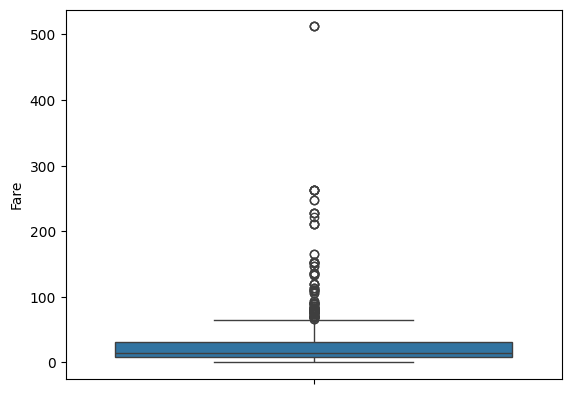

In [44]:
sns.boxplot(data_train['Fare'])

<Axes: ylabel='Fare'>

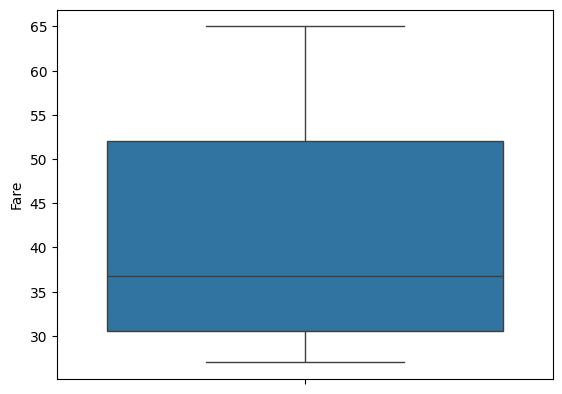

In [45]:
# Remove the outliers using the Interquartile Range Method
lowerQuartile = data_train['Fare'].quantile(0.25)
upperQuartle = data_train['Fare'].quantile(0.75)
IQR = upperQuartle - lowerQuartile
data_train = data_train[ (data_train['Fare'] > abs((lowerQuartile - (1.5*IQR)))) & (data_train['Fare'] < (upperQuartle + (1.5*IQR))) ]
sns.boxplot(data_train['Fare'])

### Clean the Test Dataset  
Now do the same cleaning process for the Test dataset

In [46]:
data_test = pd.read_csv('test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
# Identify what needs to be cleaned
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Same thing here, A lot of null values found but no data type issues

In [48]:
# Check for null values and duplicates
print(f"Num of duplicates: {data_test.duplicated().sum()}")
data_test.isna().sum()

Num of duplicates: 0


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [49]:
# For the 86 null values in age, I will replace them with the mean in order to maintain the mean
age_mean_test = data_test['Age'].mean()
print(f"Age mean before: {age_mean_test}")

data_test.fillna({'Age' : age_mean_test}, inplace=True)
age_mean_test = data_test['Age'].mean()
print(f"The mean of Age After: {age_mean_test}")
data_test.isna().sum()

Age mean before: 30.272590361445783
The mean of Age After: 30.272590361445783


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
# For the null value in Fare, I will replace it with the current average of the Fare
fare_mean_test = data_test['Fare'].mean()
print(f"The Fare avg: {fare_mean_test}")

data_test.fillna({'Fare' : fare_mean_test}, inplace=True)
fare_mean_test = data_test['Fare'].mean()
print(f"The Fare avg: {fare_mean_test}")
data_test.isna().sum()

The Fare avg: 35.627188489208635
The Fare avg: 35.627188489208635


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [51]:
# For the 327 null values in the Cabin column, I will drop this set because it is irrelevant
data_test.drop(['Cabin'], axis=1, inplace=True)
data_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now check for outliers

In [52]:
# Detecting outliers
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: ylabel='Fare'>

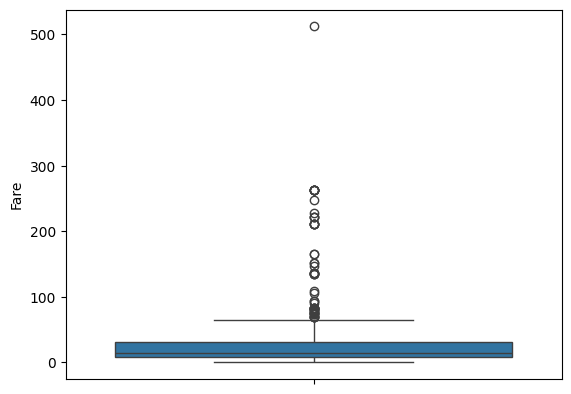

In [53]:
# Fare column has outliers
sns.boxplot(data_test['Fare'])

<Axes: ylabel='Fare'>

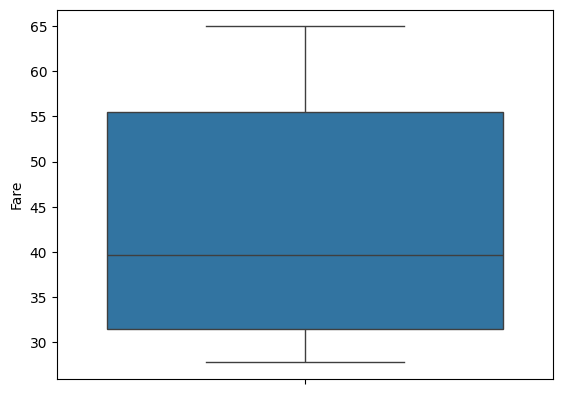

In [54]:
# Removing outlier using the IQR method
lowerQuartile2 = data_test['Fare'].quantile(0.25)
upperQuartle2 = data_test['Fare'].quantile(0.75)
IQR2 = upperQuartle2 - lowerQuartile2
data_test = data_test[ (data_test['Fare'] > abs((lowerQuartile2 - (1.5*IQR2)))) & (data_test['Fare'] < (upperQuartle2 + (1.5*IQR2))) ]
sns.boxplot(data_test['Fare'])

## Done Cleaning!

## Now I will explore the relationships of socio-economic status with other age, gender, and number of family members.

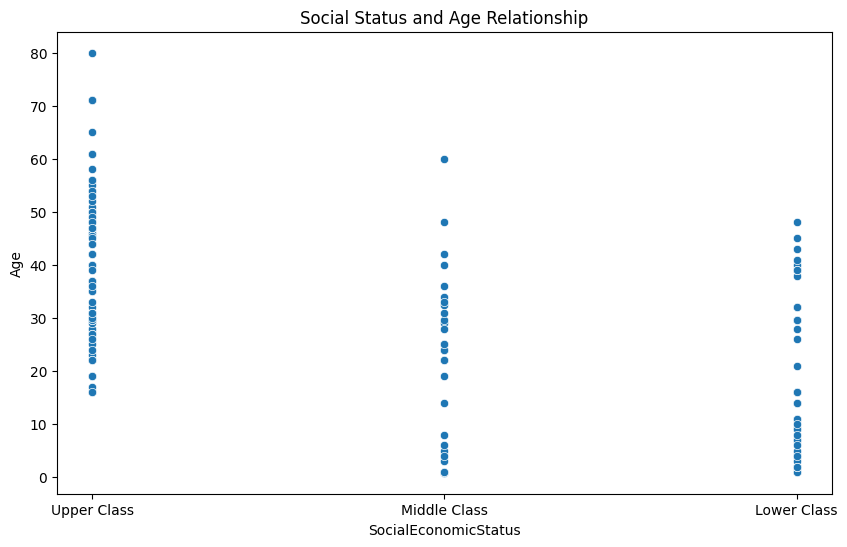

In [55]:
# I will create a social status column and plot graphs in order to visualize the relationships with other features
data_train['SocialEconomicStatus'] = data_train['Pclass'].map({1 : 'Upper Class', 2 : 'Middle Class', 3 : 'Lower Class'})
# Relationship between age and status:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SocialEconomicStatus', y='Age', data=data_train)
plt.title('Social Status and Age Relationship')
plt.show()

Upper Class seem to have more older people than other social classes and no one under the age of around 15 belongs to the upper class. Middle class and lower class have younger people and their scatter look similar.

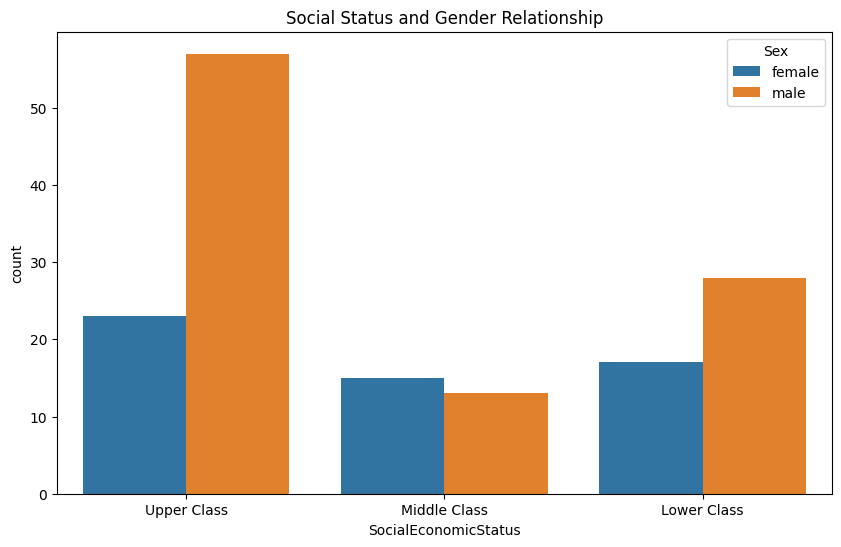

In [56]:
# Relationship between gender and status
plt.figure(figsize=(10,6))
sns.countplot(x='SocialEconomicStatus', hue='Sex', data=data_train)
plt.title('Social Status and Gender Relationship')
plt.show()

As seen in the count plot above, more males are upper class than females and that is the case as well for the lower class. More females belong to middle class than males but not by a huge difference compared to the other classes.

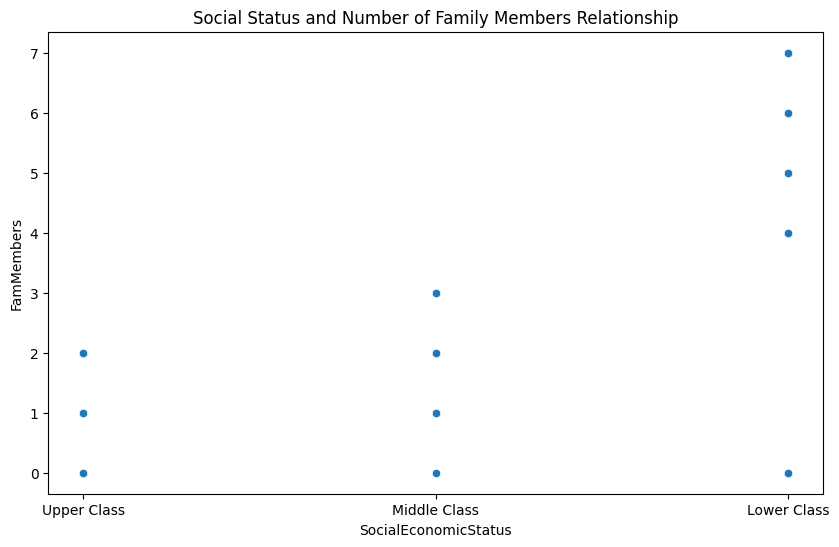

In [57]:
# Relationship between family members and status
data_train['FamMembers'] = data_train['Parch'] + data_train['SibSp']
plt.figure(figsize=(10,6))
sns.scatterplot(x='SocialEconomicStatus', y='FamMembers', data=data_train)
plt.title('Social Status and Number of Family Members Relationship')
plt.show()

The class with the most family members is the Lower class with family size of up to 7. Upper class families have 2 members max as seen above and similarily the middle class family size doesn't exceed 3 family members.

## Now I will explore the distribution of survival victims in relation to age, gender, and social class.

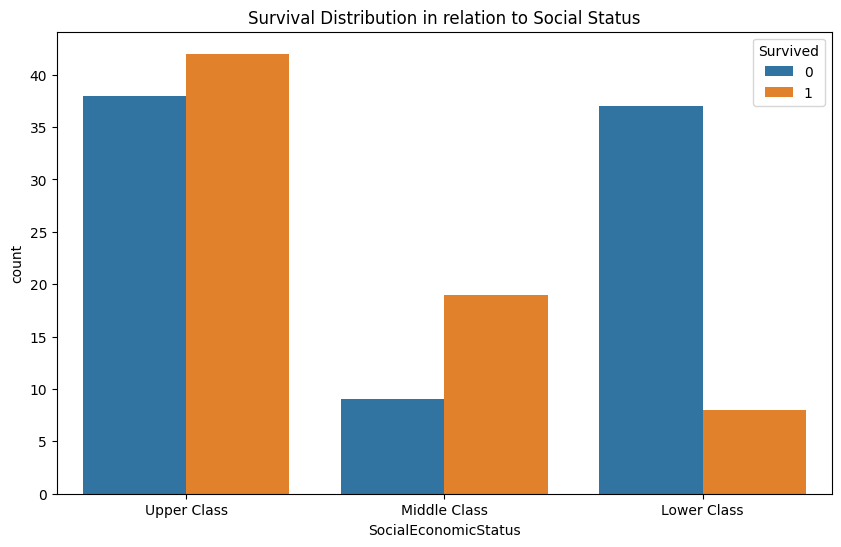

In [58]:
# Survival Distribution in relation to Social Status
plt.figure(figsize=(10,6))
sns.countplot(x='SocialEconomicStatus', hue='Survived', data=data_train)
plt.title('Survival Distribution in relation to Social Status')
plt.show()

Most survivals and most deaths as well belong to the upper class as seen in the count plot above but more survived from the upper class. More people survived in the middle class than died in contrast of the lower class where the amount of people died is way more than the people that survived.

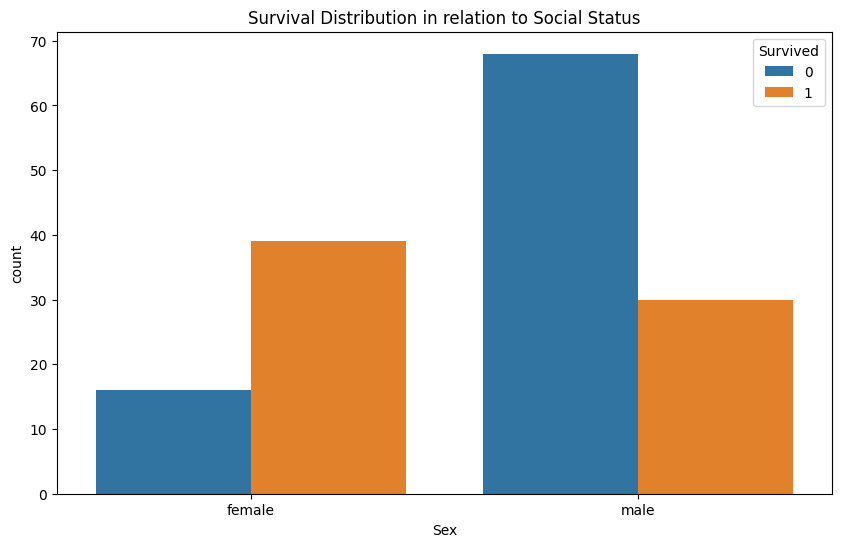

In [59]:
# Survival Distribution in relation to Gender
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data=data_train)
plt.title('Survival Distribution in relation to Social Status')
plt.show()

From the count plot above we see that more females survived the Titanic than males and we also see that the amount of deaths in males is much greater than the amount of deaths in females.

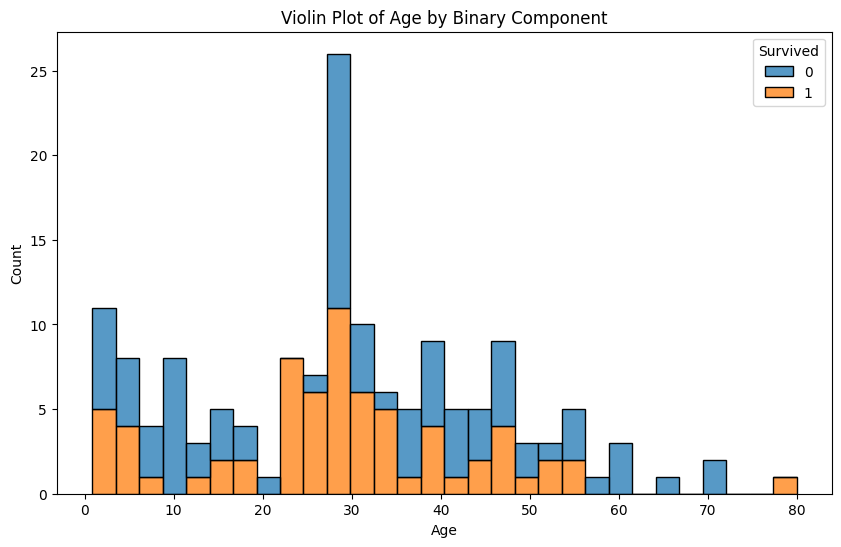

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=data_train, multiple='stack', bins=30)
plt.title('Violin Plot of Age by Binary Component')
plt.show()

The age with the most deaths and survivals is around 30 years old, more deaths than survivals unfortunately. The only ages where there are more survivals than deaths are ages in the early 20s and greater than 75 years old.

In [63]:
# Representing the previous in numbers
survival_status = data_train.groupby('SocialEconomicStatus')['Survived'].mean()
print("\nSurvival Rate by Socio-Economic Status:\n", survival_status)

survival_gender = data_train.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:\n", survival_gender)

survival_age = data_train.groupby('Survived')['Age'].describe()
print("\nAge Distribution by Survival:\n", survival_age)


Survival Rate by Socio-Economic Status:
 SocialEconomicStatus
Lower Class     0.177778
Middle Class    0.678571
Upper Class     0.525000
Name: Survived, dtype: float64

Survival Rate by Gender:
 Sex
female    0.709091
male      0.306122
Name: Survived, dtype: float64

Age Distribution by Survival:
           count       mean        std   min    25%        50%   75%   max
Survived                                                                 
0          84.0  30.071324  18.498446  1.00  13.25  29.699118  43.5  71.0
1          69.0  28.968423  15.230275  0.83  22.00  29.699118  37.0  80.0
